In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [7]:
df.shape

(59400, 41)

### Our dataset has 59,400 rows and 41 features. I'll be looking at some of these features and dropping the ones with duplicate data as well as figuring out a way to fill all the NaNs or 0s

In [8]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
df[df['amount_tsh']==0].groupby(df['quantity']).size()

quantity
dry              5516
enough          21103
insufficient    10914
seasonal         3411
unknown           695
dtype: int64

### We see above that the we have 'amount_tsh' == 0 (amount water available to waterpoint) and this doesn't make sense when the 'quantity' is not 'dry'. I'll assume that 0 value in 'amount_tsh' means we are missing values in this feature and we need to handle it.

In [32]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
print('Count of each functional type:' + '\n' + str(df.status_group.value_counts()))
print('\n' + 'Percent of each functional type:' + '\n' + str(df.status_group.value_counts(normalize=True)))

Count of each functional type:
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Percent of each functional type:
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


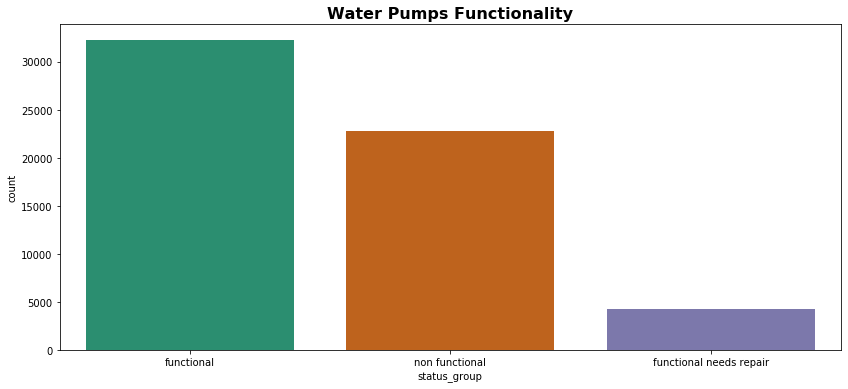

In [56]:
plt.figure(figsize=(14,6))
plt.title("Water Pumps Functionality",fontsize=16, fontweight='bold')
sns.countplot(x=df['status_group'], data=df, palette='Dark2')